## Importing shapely and json and King County demographic data as a .geojson and King County house data .csv

In [28]:
from shapely.geometry import Point, Polygon
import json
import pandas as pd
with open('../../../data/Consolidated_Demographics_Index_for_King_County_Census_Tracts___demographic_index_area.geojson') as f:
    census_tract = json.load(f)
df = pd.read_csv('../../../data/kc_house_data.csv')

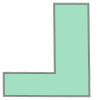

In [29]:
Polygon(census_tract['features'][0]['geometry']['coordinates'][0])

## Creating a list of dictionaries containing the name of each tract as keys and the coordinates, converted into a polygon, as the values of each dictionary. 

In [30]:
coords = []

for x in census_tract['features']:
    d = {}
    d['label'] = x['properties']['TRACT_LBL']
    shape = x['geometry']['coordinates']
    if len(shape) != 1:
        d['shape'] = Polygon(shape[0][0]+shape[1][0])  #accounts for census tracts consisting of more than one polygon
    else:
        d["shape"] = Polygon(shape[0])
    coords.append(d)

### coordinates and shape of a random (20th) census tract

In [31]:
coords[20]

{'label': 'Tract 001100',
 'shape': <shapely.geometry.polygon.Polygon at 0x7f99fa3b7d00>}

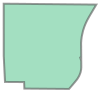

In [32]:
coords[20]['shape']

## making column of home coordinates by zipping long and lat columns from housing data frame

In [33]:
df.coordinates = list(zip(df.long, df.lat))

<ipython-input-33-4db589e91429>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coordinates = list(zip(df.long, df.lat))


## Creating list of each home's tract, putting a 0 for any homes that were not within any tract. There were 29 such homes.

In [43]:
tracts = []
for coordinate in df.coordinates:
    point = Point(coordinate)
    found = False
    for x in coords:
        if x['shape'].contains(point):
            tracts.append(x['label'])
            found = True       
    if not found:
        tracts.append(0)
        

## ensuring 

In [44]:
print(len(tracts), len(df))

21597 21597


## Creating column in KC house data frame from list of census tracts.

In [45]:
df['tracts'] = tracts

## Exporting to .csv

In [246]:
#df.to_csv('housing_data.csv')